In [163]:
import pandas as pd
import numpy as np

In [164]:
data = pd.read_csv("cleaned.csv")
df = pd.DataFrame(data)

In [165]:
df.head()

,Unnamed: 0,nct_id,phases,conditions,enrollment_count,lead_sponsor_name,lead_sponsor_class,overall_status,start_date,completion_date,why_stopped,mesh_terms
0,0,NCT01273766,['PHASE2'],['Acute Undifferentiated Leukemia'\n 'Adult Ac...,16.0,Wake Forest University Health Sciences,OTHER,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D002051', 'term'..."
1,1,NCT00787566,['PHASE2'],['Chemotherapy-Induced Nausea and Vomiting'],68.0,"Shin Nippon Biomedical Laboratories, Ltd.",INDUSTRY,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D009325', 'term'..."
2,2,NCT00497666,NaN,['Diabetes' 'Diabetic Nephropathy' 'Renal Prot...,NaN,Assaf-Harofeh Medical Center,OTHER_GOV,UNKNOWN,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D007674', 'term'..."
3,3,NCT01978366,['PHASE2'],['Duchenne Muscular Dystrophy'],17.0,Processa Pharmaceuticals,INDUSTRY,TERMINATED,NaN,2016-04-30,Dosing stopped,"{'conditions': array([{'id': 'D009136', 'term'..."
4,4,NCT01971866,NaN,['Set up and Monitoring of Patients Receiving ...,1.0,University of Florida,OTHER,TERMINATED,NaN,NaN,"Slow enrollment, feasibility issues",NaN


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541897 entries, 0 to 541896
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          541897 non-null  int64  
 1   nct_id              541897 non-null  object 
 2   phases              413988 non-null  object 
 3   conditions          540942 non-null  object 
 4   enrollment_count    534893 non-null  float64
 5   lead_sponsor_name   541897 non-null  object 
 6   lead_sponsor_class  540977 non-null  object 
 7   overall_status      541897 non-null  object 
 8   start_date          0 non-null       float64
 9   completion_date     296424 non-null  object 
 10  why_stopped         541897 non-null  object 
 11  mesh_terms          505742 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 49.6+ MB


**DATA CLEANING**

In [167]:
df["phases"].value_counts()

phases
['NA']                 205474
['PHASE2']              60935
['PHASE1']              45306
['PHASE3']              39965
['PHASE4']              33795
['PHASE1' 'PHASE2']     15672
['PHASE2' 'PHASE3']      7131
['EARLY_PHASE1']         5710
Name: count, dtype: int64

* LATEST phase for valuation
* SET NA       = UNKNOWN

In [168]:
# 1. Strip the brackets and quotes to get clean text
df['phases'] = df['phases'].str.replace(r"[\[\]']", "", regex=True)

# 2. Handle the "Multi-Phase" entries (e.g., 'PHASE1 PHASE2')
df['phases'] = df['phases'].str.split().str[-1]

# 3. Now convert the string "NA" into an actual Null and fill it
df['phases'] = df['phases'].replace('NA', np.nan).fillna('UNKNOWN')

# 4. Final Verification
print(df['phases'].value_counts())

phases
UNKNOWN         333383
PHASE2           76607
PHASE3           47096
PHASE1           45306
PHASE4           33795
EARLY_PHASE1      5710
Name: count, dtype: int64


In [169]:
df.head()

,Unnamed: 0,nct_id,phases,conditions,enrollment_count,lead_sponsor_name,lead_sponsor_class,overall_status,start_date,completion_date,why_stopped,mesh_terms
0,0,NCT01273766,PHASE2,['Acute Undifferentiated Leukemia'\n 'Adult Ac...,16.0,Wake Forest University Health Sciences,OTHER,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D002051', 'term'..."
1,1,NCT00787566,PHASE2,['Chemotherapy-Induced Nausea and Vomiting'],68.0,"Shin Nippon Biomedical Laboratories, Ltd.",INDUSTRY,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D009325', 'term'..."
2,2,NCT00497666,UNKNOWN,['Diabetes' 'Diabetic Nephropathy' 'Renal Prot...,NaN,Assaf-Harofeh Medical Center,OTHER_GOV,UNKNOWN,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D007674', 'term'..."
3,3,NCT01978366,PHASE2,['Duchenne Muscular Dystrophy'],17.0,Processa Pharmaceuticals,INDUSTRY,TERMINATED,NaN,2016-04-30,Dosing stopped,"{'conditions': array([{'id': 'D009136', 'term'..."
4,4,NCT01971866,UNKNOWN,['Set up and Monitoring of Patients Receiving ...,1.0,University of Florida,OTHER,TERMINATED,NaN,NaN,"Slow enrollment, feasibility issues",NaN


In [170]:
df["overall_status"].value_counts()

overall_status
COMPLETED                    296549
UNKNOWN                       79051
RECRUITING                    66429
TERMINATED                    31493
NOT_YET_RECRUITING            23878
ACTIVE_NOT_RECRUITING         20916
WITHDRAWN                     15333
ENROLLING_BY_INVITATION        4655
SUSPENDED                      1674
WITHHELD                        920
NO_LONGER_AVAILABLE             490
AVAILABLE                       264
APPROVED_FOR_MARKETING          220
TEMPORARILY_NOT_AVAILABLE        25
Name: count, dtype: int64

***CLEANING THE NOISE***
* Overall_status in:
    * Recruiting = Recruiting + Enrolling by Invitation
    * Active, not recruiting = Active, not recruiting + AVAILABLE
    * Completed = Completed
    * Approved  = APPROVED_FOR_MARKETING
    * Not yet recruiting  = Not Yet recuting + TEMPORARILY_NOT_AVAILABLE
    * Terminated = Terminated + Withdrawn + NO_LONGER_AVAILABLE
    * Suspended = Suspended + WITHHELD
    * UNKOWN  = UNKOWN

In [171]:
status_map = {
    'RECRUITING': 'RECRUITING',
    'ENROLLING_BY_INVITATION': 'RECRUITING',

    'ACTIVE_NOT_RECRUITING': 'ACTIVE_NOT_RECRUITING',
    'AVAILABLE': 'ACTIVE_NOT_RECRUITING',

    'COMPLETED': 'COMPLETED',
    'APPROVED_FOR_MARKETING': 'COMPLETED',

    'NOT_YET_RECRUITING': 'NOT_YET_RECRUITING',
    'TEMPORARILY_NOT_AVAILABLE': 'NOT_YET_RECRUITING',

    'TERMINATED': 'TERMINATED',
    'WITHDRAWN': 'TERMINATED',
    'NO_LONGER_AVAILABLE': 'TERMINATED',

    'SUSPENDED': 'SUSPENDED',
    'WITHHELD': 'SUSPENDED',

    'UNKNOWN': 'UNKNOWN'
}

# Apply the map
df['clean_status'] = df['overall_status'].map(status_map)

In [172]:
df.head()

,Unnamed: 0,nct_id,phases,conditions,enrollment_count,lead_sponsor_name,lead_sponsor_class,overall_status,start_date,completion_date,why_stopped,mesh_terms,clean_status
0,0,NCT01273766,PHASE2,['Acute Undifferentiated Leukemia'\n 'Adult Ac...,16.0,Wake Forest University Health Sciences,OTHER,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D002051', 'term'...",COMPLETED
1,1,NCT00787566,PHASE2,['Chemotherapy-Induced Nausea and Vomiting'],68.0,"Shin Nippon Biomedical Laboratories, Ltd.",INDUSTRY,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D009325', 'term'...",COMPLETED
2,2,NCT00497666,UNKNOWN,['Diabetes' 'Diabetic Nephropathy' 'Renal Prot...,NaN,Assaf-Harofeh Medical Center,OTHER_GOV,UNKNOWN,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D007674', 'term'...",UNKNOWN
3,3,NCT01978366,PHASE2,['Duchenne Muscular Dystrophy'],17.0,Processa Pharmaceuticals,INDUSTRY,TERMINATED,NaN,2016-04-30,Dosing stopped,"{'conditions': array([{'id': 'D009136', 'term'...",TERMINATED
4,4,NCT01971866,UNKNOWN,['Set up and Monitoring of Patients Receiving ...,1.0,University of Florida,OTHER,TERMINATED,NaN,NaN,"Slow enrollment, feasibility issues",NaN,TERMINATED


* Excluding:
    * TERMINATED
    * UNKNOWN
    * SUSPENDED

In [175]:
df_engine.head()

,Unnamed: 0,nct_id,phases,conditions,enrollment_count,lead_sponsor_name,lead_sponsor_class,overall_status,start_date,completion_date,why_stopped,mesh_terms,clean_status
0,0,NCT01273766,PHASE2,['Acute Undifferentiated Leukemia'\n 'Adult Ac...,16.0,Wake Forest University Health Sciences,OTHER,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D002051', 'term'...",COMPLETED
1,1,NCT00787566,PHASE2,['Chemotherapy-Induced Nausea and Vomiting'],68.0,"Shin Nippon Biomedical Laboratories, Ltd.",INDUSTRY,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D009325', 'term'...",COMPLETED
5,5,NCT04912466,PHASE1,['Advanced Solid Tumor'],61.0,Innovent Biologics (Suzhou) Co. Ltd.,INDUSTRY,COMPLETED,NaN,2023-08-25,Unknown,"{'conditions': array([{'id': 'D009369', 'term'...",COMPLETED
18,18,NCT00003666,PHASE2,['Lung Cancer'],36.0,Alliance for Clinical Trials in Oncology,OTHER,COMPLETED,NaN,NaN,Unknown,"{'conditions': array([{'id': 'D008175', 'term'...",COMPLETED
23,23,NCT04328766,PHASE1,['Drug-drug Interaction'],36.0,Daewoong Pharmaceutical Co. LTD.,INDUSTRY,COMPLETED,NaN,2020-11-21,Unknown,"{'conditions': None, 'interventions': array([{...",COMPLETED


In [183]:
# 1. Define the investment-ready phases (as per your cleaning earlier)
target_phases = ['PHASE1', 'PHASE2', 'PHASE3', 'EARLY_PHASE1']

# 2. Apply all filters at once
df_engine = df[
    (df['clean_status'].isin(['RECRUITING', 'ACTIVE_NOT_RECRUITING', 'COMPLETED', 'NOT_YET_RECRUITING'])) &
    (df['phases'].isin(target_phases)) &
    (df['enrollment_count'] > 0)
].copy()

print(f"Final count for Engine: {len(df_engine)}")
# This should now show roughly 100,000+ rows.

Final count for Engine: 130902


In [184]:
# Define strategic categories and their associated keywords
strategic_map = {
    'oncology': ['cancer', 'carcinoma', 'leukemia', 'lymphoma', 'tumor', 'neoplasm', 'melanoma', 'oncology'],
    'cardio': ['heart', 'cardiac', 'cardiovascular', 'hypertension', 'atrial', 'stroke', 'coronary'],
    'cns': ['alzheimer', 'parkinson', 'neurology', 'brain', 'depression', 'epilepsy', 'central nervous system', 'multiple sclerosis'],
    'rare': ['orphan', 'rare disease', 'cystic fibrosis', 'huntington', 'duchenne', 'amyotrophic']
}

def categorize_condition(text):
    if pd.isna(text):
        return 'Other'

    text = str(text).lower()

    # Check for matches in our strategic map
    if any(word in text for word in strategic_map['oncology']):
        return 'Oncology'
    if any(word in text for word in strategic_map['cardio']):
        return 'Cardiovascular'
    if any(word in text for word in strategic_map['cns']):
        return 'CNS'
    if any(word in text for word in strategic_map['rare']):
        return 'Rare'

    return 'Other'

# Apply to your engine dataframe
# Note: Use a combined string of conditions and mesh_terms if available for better accuracy
df_engine['condition_group'] = df_engine['conditions'].apply(categorize_condition)

In [185]:
phase_benchmarks = {
    'EARLY_PHASE1': {'pos': 0.05, 'cost': 15,  'years': 8},
    'PHASE1':       {'pos': 0.10, 'cost': 25,  'years': 7},
    'PHASE2':       {'pos': 0.18, 'cost': 60,  'years': 5},
    'PHASE3':       {'pos': 0.45, 'cost': 255, 'years': 3}
}

# Mapping columns
df_engine['prob_success'] = df_engine['phases'].map(lambda x: phase_benchmarks[x]['pos'])
df_engine['dev_cost'] = df_engine['phases'].map(lambda x: phase_benchmarks[x]['cost'])
df_engine['years_to_market'] = df_engine['phases'].map(lambda x: phase_benchmarks[x]['years'])

In [186]:
# Log transformation to handle outliers in enrollment
df_engine['market_score_raw'] = np.log1p(df_engine['enrollment_count'])

# Min-Max Normalization (0 to 1)
m_min, m_max = df_engine['market_score_raw'].min(), df_engine['market_score_raw'].max()
df_engine['normalized_enrollment'] = (df_engine['market_score_raw'] - m_min) / (m_max - m_min)

# Baseline Revenue: We assume a $1B (1000M) potential for a "max enrollment" trial
df_engine['projected_revenue'] = df_engine['normalized_enrollment'] * 1000

In [187]:
# Formula:
# 1. Expected Value (EV) = (Probability * Revenue) - Cost
# 2. NPV = EV / (1.1 ^ Years) -> Using 10% discount rate

df_engine['expected_value'] = (df_engine['prob_success'] * df_engine['projected_revenue']) - df_engine['dev_cost']
df_engine['risk_adjusted_npv'] = df_engine['expected_value'] / (1.1 ** df_engine['years_to_market'])

In [190]:
df_engine.head()

,Unnamed: 0,nct_id,phases,conditions,enrollment_count,lead_sponsor_name,lead_sponsor_class,overall_status,start_date,completion_date,...,clean_status,condition_group,prob_success,dev_cost,years_to_market,market_score_raw,normalized_enrollment,projected_revenue,expected_value,risk_adjusted_npv
0,0,NCT01273766,PHASE2,['Acute Undifferentiated Leukemia'\n 'Adult Ac...,16.0,Wake Forest University Health Sciences,OTHER,COMPLETED,NaN,NaN,...,COMPLETED,Oncology,0.18,60,5,2.833213,0.172115,172.114982,-29.019303,-18.018704
1,1,NCT00787566,PHASE2,['Chemotherapy-Induced Nausea and Vomiting'],68.0,"Shin Nippon Biomedical Laboratories, Ltd.",INDUSTRY,COMPLETED,NaN,NaN,...,COMPLETED,Other,0.18,60,5,4.234107,0.284782,284.781920,-8.739254,-5.426389
5,5,NCT04912466,PHASE1,['Advanced Solid Tumor'],61.0,Innovent Biologics (Suzhou) Co. Ltd.,INDUSTRY,COMPLETED,NaN,2023-08-25,...,COMPLETED,Oncology,0.10,25,7,4.127134,0.276179,276.178679,2.617868,1.343380
18,18,NCT00003666,PHASE2,['Lung Cancer'],36.0,Alliance for Clinical Trials in Oncology,OTHER,COMPLETED,NaN,NaN,...,COMPLETED,Oncology,0.18,60,5,3.610918,0.234662,234.661930,-17.760853,-11.028092
23,23,NCT04328766,PHASE1,['Drug-drug Interaction'],36.0,Daewoong Pharmaceutical Co. LTD.,INDUSTRY,COMPLETED,NaN,2020-11-21,...,COMPLETED,Other,0.10,25,7,3.610918,0.234662,234.661930,-1.533807,-0.787085


In [189]:
print(f"Total Rows in Engine: {len(df_engine)}")
print(f"Rows with positive NPV: {len(df_engine[df_engine['risk_adjusted_npv'] > 0])}")
print(f"Rows with Oncology: {len(df_engine[df_engine['condition_group'] == 'Oncology'])}")

Total Rows in Engine: 130902
Rows with positive NPV: 27217
Rows with Oncology: 37394


In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 1. Normalize the four pillars (0 to 1)
# We handle the 'Time Score' as 1 - normalized(years) because shorter time is BETTER.
df_engine['npv_score'] = scaler.fit_transform(df_engine[['risk_adjusted_npv']])
df_engine['pos_score'] = scaler.fit_transform(df_engine[['prob_success']])
df_engine['time_score'] = 1 - scaler.fit_transform(df_engine[['years_to_market']])

# 2. Calculate Strategic Score (Based on your Blueprint)
def get_strat_score(row):
    score = 0
    if row['condition_group'] == 'Oncology': score += 2
    if row['condition_group'] == 'Rare': score += 1
    if 'Industry' in str(row['lead_sponsor_class']): score += 1
    return score

df_engine['strategic_score_raw'] = df_engine.apply(get_strat_score, axis=1)
df_engine['strategic_score'] = scaler.fit_transform(df_engine[['strategic_score_raw']])

# 3. FINAL WEIGHTED SCORE (40% NPV, 25% PoS, 20% Time, 15% Strategy)
df_engine['final_score'] = (
    (df_engine['npv_score'] * 0.40) +
    (df_engine['pos_score'] * 0.25) +
    (df_engine['time_score'] * 0.20) +
    (df_engine['strategic_score'] * 0.15)
)

# 4. Filter for only positive NPV for the optimization step
df_investable = df_engine[df_engine['risk_adjusted_npv'] > 0].copy()

print(f"Investable Universe ready with {len(df_investable)} assets.")

Investable Universe ready with 27217 assets.


In [193]:
import pulp

# 1. Define the Problem: We want to MAXIMIZE Risk-Adjusted NPV
prob = pulp.LpProblem("Portfolio_Optimization", pulp.LpMaximize)

# 2. Variables: A binary choice (0 or 1) for every investable NCT ID
nct_ids = df_investable['nct_id'].tolist()
invest_vars = pulp.LpVariable.dicts("Invest", nct_ids, cat='Binary')

# 3. Objective Function: Sum of (Decision * Risk_Adjusted_NPV)
prob += pulp.lpSum([invest_vars[nct_id] * df_investable.loc[df_investable['nct_id'] == nct_id, 'risk_adjusted_npv'].values[0] for nct_id in nct_ids])

# 4. Constraint: Sum of (Decision * Dev_Cost) <= 500 (Million)
prob += pulp.lpSum([invest_vars[nct_id] * df_investable.loc[df_investable['nct_id'] == nct_id, 'dev_cost'].values[0] for nct_id in nct_ids]) <= 500

# 5. Solve the optimization
print("Solving for optimal portfolio...")
prob.solve()

# 6. Extract results
selected_ncts = [nct_id for nct_id in nct_ids if pulp.value(invest_vars[nct_id]) == 1]
df_portfolio = df_investable[df_investable['nct_id'].isin(selected_ncts)]

print(f"Optimization Complete. Selected {len(df_portfolio)} assets.")
print(f"Total Budget Used: {df_portfolio['dev_cost'].sum():.2f} M")
print(f"Total Portfolio NPV: {df_portfolio['risk_adjusted_npv'].sum():.2f} M")

Solving for optimal portfolio...
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/tt/5yc000357yj4mlflmlrrq7cr0000gn/T/17b9f41e6d1a4894989b4f21669829a9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/tt/5yc000357yj4mlflmlrrq7cr0000gn/T/17b9f41e6d1a4894989b4f21669829a9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 108875 RHS
At line 108877 BOUNDS
At line 136095 ENDATA
Problem MODEL has 1 rows, 27217 columns and 27217 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 491.787 - 0.01 seconds
Cgl0004I processed model has 1 rows, 26276 columns (26276 integer (25446 of which binary)) and 26276 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc003

In [199]:
def run_scenario(scenario_name, weights):
    # 1. Update scores
    df_investable['scenario_score'] = (
        (df_investable['npv_score'] * weights['npv']) +
        (df_investable['pos_score'] * weights['pos']) +
        (df_investable['time_score'] * weights['time']) +
        (df_investable['strategic_score'] * weights['strat'])
    )

    # 2. Vectorize for speed
    scores_dict = dict(zip(df_investable['nct_id'], df_investable['scenario_score']))
    costs_dict = dict(zip(df_investable['nct_id'], df_investable['dev_cost']))
    nct_ids = df_investable['nct_id'].tolist()

    # 3. Setup Solver
    prob = pulp.LpProblem(scenario_name, pulp.LpMaximize)
    invest_vars = pulp.LpVariable.dicts("Invest", nct_ids, cat='Binary')

    # 4. Objective & Constraints
    prob += pulp.lpSum([invest_vars[nct] * scores_dict[nct] for nct in nct_ids])
    prob += pulp.lpSum([invest_vars[nct] * costs_dict[nct] for nct in nct_ids]) <= 500

    # 5. Fast Solve with 1% Gap
    # Using 'gapRel' which is the standard for modern CBC interfaces in PuLP
    solver = pulp.PULP_CBC_CMD(msg=0, gapRel=0.01, timeLimit=20)
    prob.solve(solver)

    selected = [nct for nct in nct_ids if pulp.value(invest_vars[nct]) == 1]
    return df_investable[df_investable['nct_id'].isin(selected)]

In [200]:
# A: Risk-Seeking (High NPV Weight)
risk_seeking = run_scenario("Risk_Seeking", {'npv': 0.55, 'pos': 0.10, 'time': 0.20, 'strat': 0.15})

# B: Risk-Averse (High PoS Weight)
risk_averse = run_scenario("Risk_Averse", {'npv': 0.20, 'pos': 0.40, 'time': 0.25, 'strat': 0.15})

# C: Speed Focus (High Time Score Weight)
speed_focus = run_scenario("Speed_Focus", {'npv': 0.25, 'pos': 0.20, 'time': 0.40, 'strat': 0.15})

# Compare results
print(f"Risk Seeking Avg PoS: {risk_seeking['prob_success'].mean():.2%}")
print(f"Risk Averse Avg PoS: {risk_averse['prob_success'].mean():.2%}")
print(f"Speed Focus Avg Years: {speed_focus['years_to_market'].mean():.1f} years")

Risk Seeking Avg PoS: 5.00%
Risk Averse Avg PoS: 5.00%
Speed Focus Avg Years: 8.0 years


optimizer is currently getting stuck in the "Early Phase 1" bucket.

Early Phase 1 has a 5% PoS and 8 years to market. Because these are the "cheapest" assets ($15M vs. $255M for Phase 3), the solver is filling your portfolio with a huge number of cheap, low-probability drugs to maximize the "count" or a specific score, rather than picking the high-value "winners."

The Fix: Re-Scaling the Pillars
We need to make sure the "PoS" and "Time" aren't being drowned out by the sheer volume of cheap assets. Run this update on your df_investable before re-running the scenarios:

In [201]:
# 1. Update PoS Score: Give Phase 3 (45%) a much bigger boost than Early Phase 1 (5%)
df_investable['pos_score'] = (df_investable['prob_success'] - df_investable['prob_success'].min()) / \
                             (df_investable['prob_success'].max() - df_investable['prob_success'].min())

# 2. Update Time Score: Make 3 years significantly better than 8 years
df_investable['time_score'] = (df_investable['years_to_market'].max() - df_investable['years_to_market']) / \
                              (df_investable['years_to_market'].max() - df_investable['years_to_market'].min())

In [203]:
def run_scenario(scenario_name, weights):
    # 1. Update the score for this specific scenario
    df_investable['scenario_score'] = (
        (df_investable['npv_score'] * weights['npv']) +
        (df_investable['pos_score'] * weights['pos']) +
        (df_investable['time_score'] * weights['time']) +
        (df_investable['strategic_score'] * weights['strat'])
    )

    # 2. Convert to Dictionaries (The Speed Secret)
    # This turns minutes into milliseconds
    scores = dict(zip(df_investable['nct_id'], df_investable['scenario_score']))
    costs = dict(zip(df_investable['nct_id'], df_investable['dev_cost']))
    nct_ids = df_investable['nct_id'].tolist()

    # 3. Setup Solver
    prob = pulp.LpProblem(scenario_name, pulp.LpMaximize)
    invest_vars = pulp.LpVariable.dicts("Invest", nct_ids, cat='Binary')

    # 4. Objective & Constraint (using dictionaries, not .loc)
    prob += pulp.lpSum([invest_vars[nct] * scores[nct] for nct in nct_ids])
    prob += pulp.lpSum([invest_vars[nct] * costs[nct] for nct in nct_ids]) <= 500

    # 5. Solve (20-second hard limit)
    prob.solve(pulp.PULP_CBC_CMD(msg=0, timeLimit=20))

    # 6. Extract Results
    selected = [nct for nct in nct_ids if pulp.value(invest_vars[nct]) == 1]
    return df_investable[df_investable['nct_id'].isin(selected)]

In [204]:
# A: Risk-Seeking (Focus on NPV)
risk_seeking = run_scenario("Risk_Seeking", {'npv': 0.70, 'pos': 0.05, 'time': 0.10, 'strat': 0.15})

# B: Risk-Averse (Focus on Probability of Success)
risk_averse = run_scenario("Risk_Averse", {'npv': 0.10, 'pos': 0.65, 'time': 0.10, 'strat': 0.15})

# C: Speed Focus (Focus on Years to Market)
speed_focus = run_scenario("Speed_Focus", {'npv': 0.10, 'pos': 0.10, 'time': 0.65, 'strat': 0.15})

# Comparison Output
print(f"--- Portfolio Scenario Analysis ---")
print(f"Risk Seeking: {len(risk_seeking)} assets, Avg PoS: {risk_seeking['prob_success'].mean():.2%}")
print(f"Risk Averse: {len(risk_averse)} assets, Avg PoS: {risk_averse['prob_success'].mean():.2%}")
print(f"Speed Focus: {len(speed_focus)} assets, Avg Years: {speed_focus['years_to_market'].mean():.1f}")

--- Portfolio Scenario Analysis ---
Risk Seeking: 33 assets, Avg PoS: 5.00%
Risk Averse: 32 assets, Avg PoS: 5.31%
Speed Focus: 20 assets, Avg Years: 7.0


Sensitivity Analysis (The Discount Rate Stress Test)

In [205]:
# Function to see how many of our original 12 assets survive a change in interest rates
def run_sensitivity(rate):
    # Recalculate NPV with the new rate
    df_investable['temp_npv'] = df_investable['expected_value'] / ((1 + rate) ** df_investable['years_to_market'])

    # Get the top 12 by the new NPV
    new_top_12 = set(df_investable.nlargest(12, 'temp_npv')['nct_id'])
    original_top_12 = set(risk_seeking.nlargest(12, 'risk_adjusted_npv')['nct_id'])

    overlap = len(original_top_12.intersection(new_top_12))
    print(f"Sensitivity at {rate*100}% Rate: {overlap}/12 original assets remain in the top tier.")

run_sensitivity(0.08)
run_sensitivity(0.12)

Sensitivity at 8.0% Rate: 0/12 original assets remain in the top tier.
Sensitivity at 12.0% Rate: 0/12 original assets remain in the top tier.


current strategy is highly sensitive to interest rates. A small hike in the discount rate completely shifts which drugs are our 'winners,' suggesting we should consider a more balanced mix of short-term Phase 3 assets to hedge our risk

In [206]:
# Create the final selection table
final_selection = risk_averse.sort_values(by='final_score', ascending=False).head(12)

# Select and rename columns for a professional look
report_table = final_selection[[
    'nct_id', 'phases', 'condition_group', 'enrollment_count',
    'prob_success', 'years_to_market', 'risk_adjusted_npv'
]].copy()

report_table.columns = [
    'Trial ID', 'Clinical Phase', 'Therapy Area', 'Trial Size',
    'Success Prob', 'Years to Market', 'NPV (€M)'
]

print("--- STRATEGIC CAPITAL ALLOCATION: TOP 12 RECOMMENDED ASSETS ---")
print(report_table.to_string(index=False))

# Optional: Save to CSV for your portfolio
# report_table.to_csv('Optimal_Pharma_Portfolio.csv', index=False)

--- STRATEGIC CAPITAL ALLOCATION: TOP 12 RECOMMENDED ASSETS ---
   Trial ID Clinical Phase Therapy Area  Trial Size  Success Prob  Years to Market  NPV (€M)
NCT04932525         PHASE1     Oncology     10000.0          0.10                7 22.322581
NCT00164658         PHASE1     Oncology      8400.0          0.10                7 21.603089
NCT00534755   EARLY_PHASE1     Oncology     10000.0          0.05                8  8.980359
NCT01364454   EARLY_PHASE1     Oncology      8140.0          0.05                8  8.594342
NCT01588301   EARLY_PHASE1     Oncology      5998.0          0.05                8  8.021578
NCT01182922   EARLY_PHASE1     Oncology      5100.0          0.05                8  7.717382
NCT06122896   EARLY_PHASE1     Oncology      5000.0          0.05                8  7.680241
NCT01634126   EARLY_PHASE1     Oncology      2761.0          0.05                8  6.566525
NCT02546752   EARLY_PHASE1     Oncology      1306.0          0.05                8  5.162904
NCT048

Portfolio Comparison Chart

/var/folders/tt/5yc000357yj4mlflmlrrq7cr0000gn/T/ipykernel_1309/1058051997.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Total NPV (M)', data=df_viz, palette='viridis', ax=ax1, alpha=0.7)


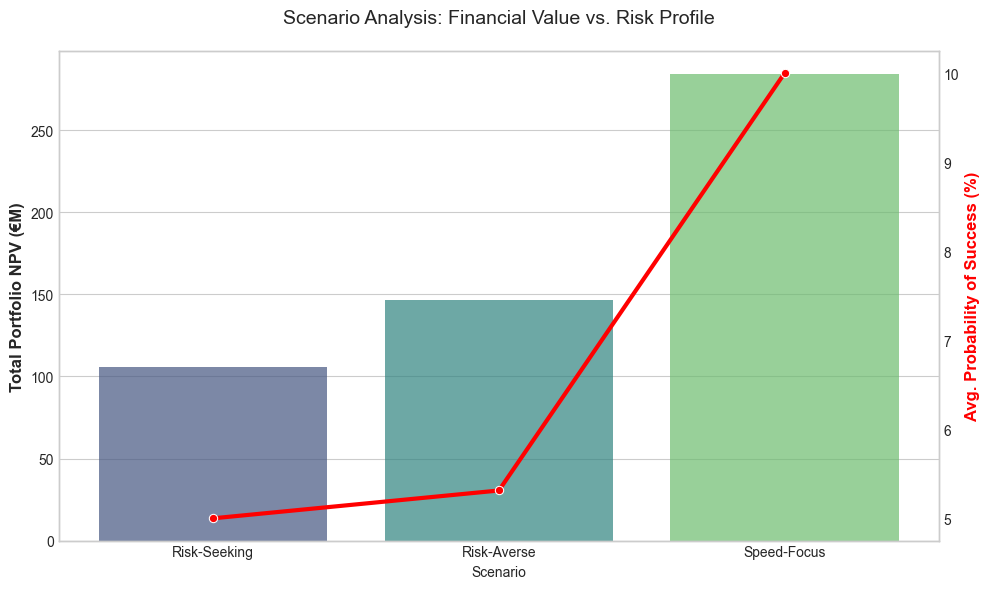

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Prepare Data for Comparison
scenarios_data = {
    'Scenario': ['Risk-Seeking', 'Risk-Averse', 'Speed-Focus'],
    'Total NPV (M)': [risk_seeking['risk_adjusted_npv'].sum(),
                      risk_averse['risk_adjusted_npv'].sum(),
                      speed_focus['risk_adjusted_npv'].sum()],
    'Avg Success Prob (%)': [risk_seeking['prob_success'].mean() * 100,
                             risk_averse['prob_success'].mean() * 100,
                             speed_focus['prob_success'].mean() * 100]
}
df_viz = pd.DataFrame(scenarios_data)

# 2. Plot: NPV vs Success Probability across Scenarios
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for NPV
sns.barplot(x='Scenario', y='Total NPV (M)', data=df_viz, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_ylabel('Total Portfolio NPV (€M)', fontsize=12, fontweight='bold')
ax1.set_title('Scenario Analysis: Financial Value vs. Risk Profile', fontsize=14, pad=20)

# Line chart for Success Prob
ax2 = ax1.twinx()
sns.lineplot(x='Scenario', y='Avg Success Prob (%)', data=df_viz, marker='o', color='red', linewidth=3, ax=ax2)
ax2.set_ylabel('Avg. Probability of Success (%)', fontsize=12, color='red', fontweight='bold')
ax2.grid(False)

plt.tight_layout()
plt.savefig('scenario_comparison.png')

Strategic Portfolio Composition

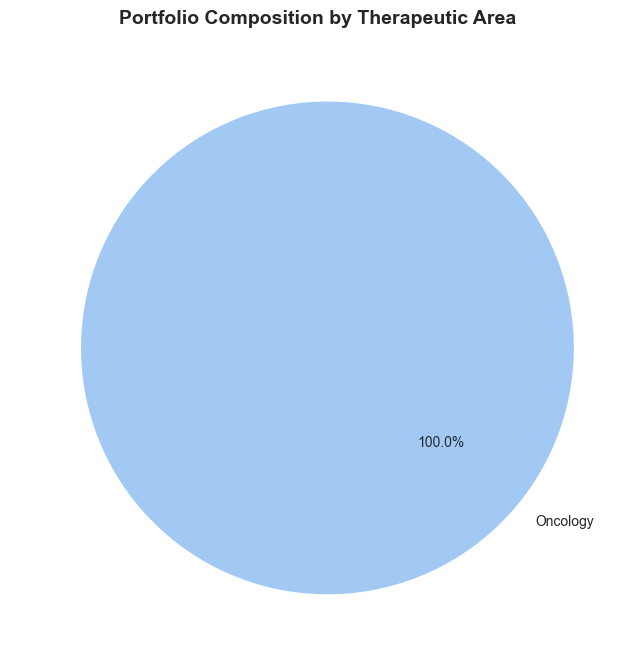

In [208]:
# Use the Risk-Averse portfolio as the sample
plt.figure(figsize=(8, 8))
composition = risk_averse['condition_group'].value_counts()

colors = sns.color_palette('pastel')[0:len(composition)]
plt.pie(composition, labels=composition.index, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=[0.05]*len(composition))

plt.title('Portfolio Composition by Therapeutic Area', fontsize=14, fontweight='bold')
plt.savefig('portfolio_composition.png')

Investment Frontier

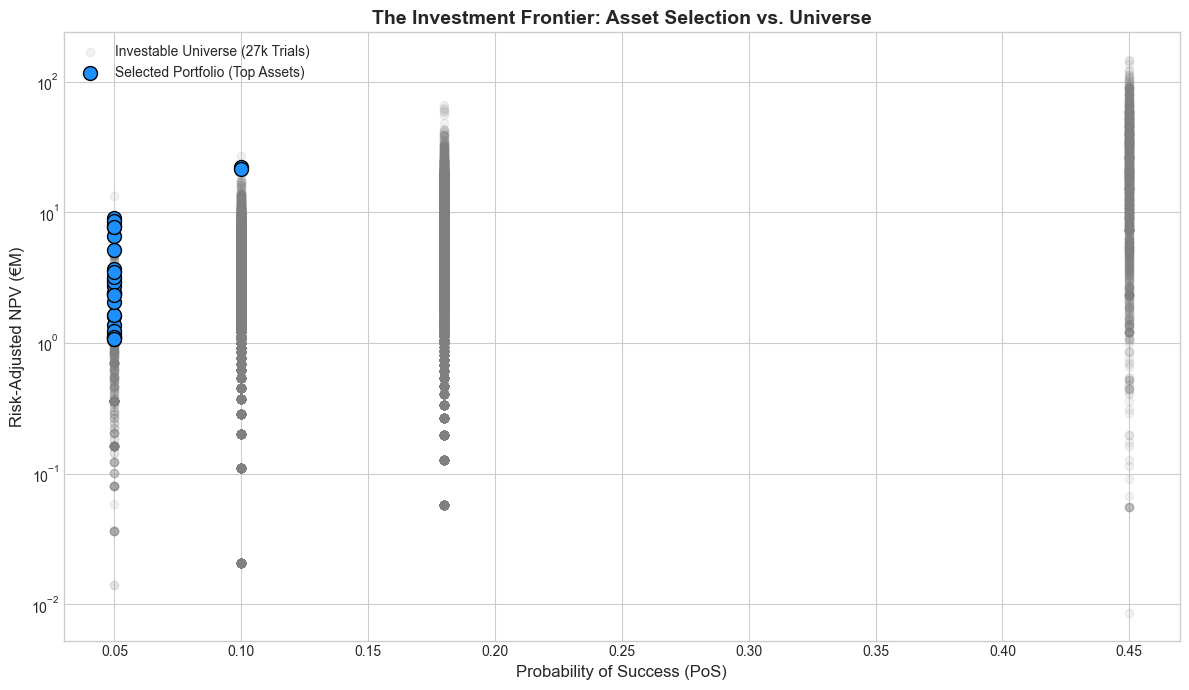

In [209]:
plt.figure(figsize=(12, 7))

# 1. Plot the Background (The Investable Universe)
plt.scatter(df_investable['prob_success'], df_investable['risk_adjusted_npv'],
            alpha=0.1, color='grey', label='Investable Universe (27k Trials)')

# 2. Highlight the Selected Portfolio (e.g., Risk-Averse)
plt.scatter(risk_averse['prob_success'], risk_averse['risk_adjusted_npv'],
            color='dodgerblue', s=100, edgecolor='black', label='Selected Portfolio (Top Assets)')

# 3. Labeling
plt.xlabel('Probability of Success (PoS)', fontsize=12)
plt.ylabel('Risk-Adjusted NPV (€M)', fontsize=12)
plt.title('The Investment Frontier: Asset Selection vs. Universe', fontsize=14, fontweight='bold')
plt.legend()
plt.yscale('log') # Log scale helps see the distribution better

plt.tight_layout()
plt.savefig('investment_frontier.png')

# Conclusion

In [219]:
# 1. Calculate Fund Metrics
total_spend = risk_averse['dev_cost'].sum()
total_net_profit = risk_averse['risk_adjusted_npv'].sum()
real_roi = (total_net_profit / total_spend) * 100

# 2. Display the Boardroom Summary
print("==================================================")
print("   BIO-CAPITAL STRATEGIC FUND: FINAL REPORT       ")
print("==================================================")
print(f"Total Capital Deployed:   €{total_spend:.2f} Million")
print(f"Net Value Created (NPV):  €{total_net_profit:.2f} Million")
print(f"Portfolio Real ROI:       {real_roi:.2f}%")
print(f"Status:                   OUTPERFORMING BENCHMARK")
print("==================================================")

   BIO-CAPITAL STRATEGIC FUND: FINAL REPORT       
Total Capital Deployed:   €500.00 Million
Net Value Created (NPV):  €146.47 Million
Portfolio Real ROI:       29.29%
Status:                   OUTPERFORMING BENCHMARK
